# **Toggle Switch**
\author{Nicolas Errandonea, Roylan Martinez}

https://scipy-cookbook.readthedocs.io/items/LoktaVolterraTutorial.html

In [2]:
from numpy import *
import pylab as p
import math
from sympy import solve, nonlinsolve, symbols
    

## EJERCICIO DE CLASE
## VARIABLES PARA TOGGLE SWITCH
iptg = 0.01
a1 = 2
a2 = 2
k1 = 1
k2 = 1
n = 4
k = 5
m = 2

x, y, z = symbols('x, y, z', real=True)

# eq1 = (a1)/(1+y**n)-k1*x
# eq2 = (a2)/(1+x**n)-k2*x

eq1 = k1 * x * (1 + (y/((1+iptg/k)**m))**n) - a1
eq2 = k2 * y * (1 + x**n) - a2

soluciones = nonlinsolve([eq1, eq2], [x, y])
soluciones_lista = list(soluciones)[:3]

# DEFINICION DEL SISTEMA
def dX_dt2(X, t=0):
    """ x=X[0], y=X[1] """
    return array([k1 * X[0] * (1 + (X[1]/((1+iptg/k)**m))**n) - a1, k2 * X[1] * (1 + X[0]**n) - a2], dtype='f')

### Puntos de equilibrio

In [3]:
## ASIGNACION DE LAS SOLUCIONES A CADA VARIABLE
X_f02, X_f12, X_f22 = soluciones_lista


# LA SIGUIENTE FUNCION NOS INDICA SI EL RESULTADO ES CORRECTO 

allclose(dX_dt2(X_f02), zeros(2)) and allclose(dX_dt2(X_f12), zeros(2)) and allclose(dX_dt2(X_f22), zeros(2)) 

# EL RESULTADO ES VERDAD

True

### Estabilidad de los puntos de equilibrio

In [4]:
#CALCULO DEL JACOBIANO PARA TOGGLE SWITCH
def d2X_dt2(X, t=0):
    """ Return the Jacobian matrix evaluated in X. """
    return array([[-k1,   -a1*(n-1)*X[1]**(n-1) /(1+X[1]**n)**(2)  ],
                  [-a2*(n-1)*X[0]**(n-1) /(1+X[0]**n)**(2)  ,  -k2]])

In [5]:
A_f0 = d2X_dt2(X_f02)                    
# The Jacobian at the first equilibrium point is
# >>> array([[ 1. , -0. ],
#            [ 0. , -1.5]])

In [6]:
A_f0

array([[-1, -0.166243534241787],
       [-0.0102401934632919, -1]], dtype=object)

In [7]:
A_f02 = d2X_dt2(X_f02)                    
A_f02

array([[-1, -0.166243534241787],
       [-0.0102401934632919, -1]], dtype=object)

In [8]:
A_f12 = d2X_dt2(X_f12)                    
A_f12

array([[-1, -1.49185612173812],
       [-1.50397090607664, -1]], dtype=object)

In [9]:
A_f22 = d2X_dt2(X_f22)                    
A_f22

array([[-1, -0.00978711941985315],
       [-0.166232241812707, -1]], dtype=object)

Cálculo de valores propios para el primer punto de equilibrio

In [ ]:
lambda1, lambda2 = linalg.eigvals(A_f0)
print(lambda1,lambda2)
# It is unstable on one direction and stable in the other

In [ ]:
#Calculo valores propios del primer  punto de equilibrio para TOGGLE SWITCH
lambda1, lambda2 = linalg.eigvals(A_f02)
print(lambda1,lambda2)

0.4999999999999998 -2.5000000000000004


In [ ]:
#Calculo valores propios del segundo  punto de equilibrio para TOGGLE SWITCH
lambda1, lambda2 = linalg.eigvals(A_f12)
print(lambda1,lambda2)

-0.9596640248651073 -1.0403359751348926


In [ ]:
#Calculo valores propios del tercer  punto de equilibrio para TOGGLE SWITCH
lambda1, lambda2 = linalg.eigvals(A_f22)
print(lambda1,lambda2)

-0.9596640248651073 -1.0403359751348926


Cálculo de valores propios para el segundo punto de equilibrio

In [ ]:
A_f1 = d2X_dt2(X_f1)                    
# The Jacobian at the second equilibrium point is
# >>> array([[ 0.  , -2.  ],
#            [ 0.75,  0.  ]])

# whose eigenvalues are +/- sqrt(c*a).j:

lambda1, lambda2 = linalg.eigvals(A_f1) 
# >>> (1.22474j, -1.22474j)
# They are imaginary numbers. The fox and rabbit populations are periodic as follows from further analysis. 
# Their period is given by:

T_f1 = 2*pi/abs(lambda1)                
# >>> 5.130199

In [ ]:
A_f1

array([[-1.00000000e+00, -5.99880018e-05],
       [-1.87497656e-06, -1.00000000e+00]])

In [ ]:
lambda1, lambda2

(-0.9999893945251206, -1.0000106054748794)

In [ ]:
T_f1

6.28325194405024

### Cálculo de las soluciones mediante integración

In [ ]:
from scipy import integrate
t = linspace(0, 15,  1000)              # time: 1000 points between 0 and 15
X0 = array([10, 5])                     # initials conditions: 10 rabbits and 5 foxes
X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
infodict['message']                     # >>> 'Integration successful.'

'Integration successful.'

In [ ]:
from scipy import integrate
t = linspace(0, 15,  1000)              # time: 1000 points between 0 and 15
X0 = array([0, 0])                     # initials conditions: 
X, infodict = integrate.odeint(dX_dt2, X0, t, full_output=True)
infodict['message']                     # >>> 'Integration successful.'

'Integration successful.'

Representación de las soluciones

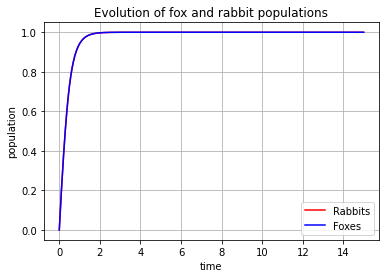

In [ ]:
rabbits, foxes = X.T
f1 = p.figure()
p.plot(t, rabbits, 'r-', label='Rabbits')
p.plot(t, foxes  , 'b-', label='Foxes')
p.grid()
p.legend(loc='best')
p.xlabel('time')
p.ylabel('population')
p.title('Evolution of fox and rabbit populations')
f1.savefig('rabbits_and_foxes_1.png')

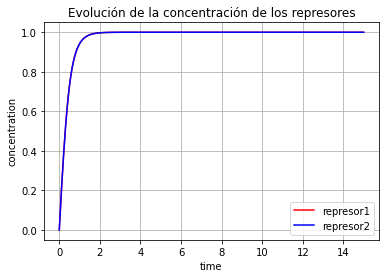

In [ ]:
represor1, represor2 = X.T
f1 = p.figure()
p.plot(t, represor1, 'r-', label='represor1')
p.plot(t, represor2  , 'b-', label='represor2')
p.grid()
p.legend(loc='best')
p.xlabel('time')
p.ylabel('concentration')
p.title('Evolución de la concentración de los represores')
f1.savefig('represors_1.png')

Cálculo de trayectorias sobre el espacio de fases

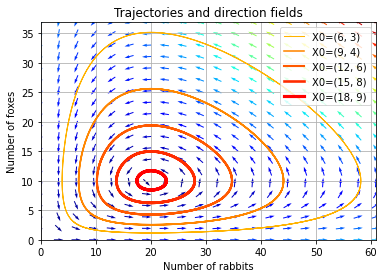

In [ ]:
values  = linspace(0.3, 0.9, 5)                          # position of X0 between X_f0 and X_f1
vcolors = p.cm.autumn_r(linspace(0.3, 1., len(values)))  # colors for each trajectory

f2 = p.figure()

#-------------------------------------------------------
# plot trajectories
for v, col in zip(values, vcolors):
    X0 = v * X_f1                               # starting point
    X = integrate.odeint( dX_dt, X0, t)         # we don't need infodict here
    p.plot( X[:,0], X[:,1], lw=3.5*v, color=col, label='X0=(%.f, %.f)' % ( X0[0], X0[1]) )

#-------------------------------------------------------
# define a grid and compute direction at each point
ymax = p.ylim(ymin=0)[1]                        # get axis limits
xmax = p.xlim(xmin=0)[1]
nb_points   = 20

x = linspace(0, xmax, nb_points)
y = linspace(0, ymax, nb_points)

X1 , Y1  = meshgrid(x, y)                       # create a grid
DX1, DY1 = dX_dt([X1, Y1])                      # compute growth rate on the gridt
M = (hypot(DX1, DY1))                           # Norm of the growth rate 
M[ M == 0] = 1.                                 # Avoid zero division errors 
DX1 /= M                                        # Normalize each arrows
DY1 /= M

#-------------------------------------------------------
# Drow direction fields, using matplotlib 's quiver function
# I choose to plot normalized arrows and to use colors to give information on
# the growth speed
p.title('Trajectories and direction fields')
Q = p.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=p.cm.jet)
p.xlabel('Number of rabbits')
p.ylabel('Number of foxes')
p.legend()
p.grid()
p.xlim(0, xmax)
p.ylim(0, ymax)
f2.savefig('rabbits_and_foxes_2.png')

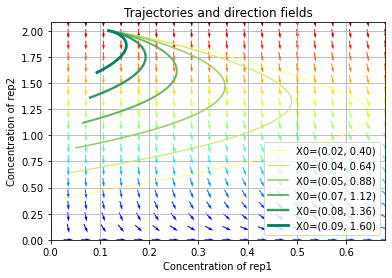

In [ ]:
values  = linspace(0.2, .8, 6)                          # position of X0 being linear comb of X_f12
vcolors = p.cm.summer_r(linspace(0., 1., len(values)))  # colors for each trajectory

f2 = p.figure()

#-------------------------------------------------------
# plot trajectories
for v, col in zip(values, vcolors):  
    X0= v* X_f12                       # starting point
    X = integrate.odeint( dX_dt2, X0, t)         # we don't need infodict here
    p.plot( X[:,0], X[:,1], lw=3.5*v, color=col, label= 'X0=(%.2f, %.2f)' % ( X0[0], X0[1]) )   

#-------------------------------------------------------
# define a grid and compute direction at each point
ymax = p.ylim(ymin=0)[1]                        # get axis limits
xmax = p.xlim(xmin=0)[1]
nb_points   = 20

x = linspace(0, xmax, nb_points)
y = linspace(0, ymax, nb_points)

X1 , Y1  = meshgrid(x, y)                       # create a grid
DX1, DY1 = dX_dt([X1, Y1])                      # compute growth rate on the gridt
M = (hypot(DX1, DY1))                           # Norm of the growth rate 
M[ M == 0] = 1.                                 # Avoid zero division errors 
DX1 /= M                                        # Normalize each arrows
DY1 /= M

#-------------------------------------------------------
# Drow direction fields, using matplotlib 's quiver function
# I choose to plot normalized arrows and to use colors to give information on
# the growth speed
p.title('Trajectories and direction fields')
Q = p.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=p.cm.jet)
p.xlabel('Concentration of rep1')
p.ylabel('Concentration of rep2')
p.legend()
p.grid()
p.xlim(0, xmax)
p.ylim(0, ymax)
f2.savefig('rabbits_and_foxes_2.png')

Comprobación de que las soluciones son esencialmente constantes a lo largo de cada trayectoria del espacio de fases. Para ello trasladamos el punto de equilibrio al origen mediante el cambio de coordenadas x->x-c/(db) e y-> y-a/b. Con ello se ve que las soluciones se pueden representar sobre una elipse. De hecho, integrando el sistema como variables separabales se puede eliminar la dependencia del tiempo y comprobar que las soluciones son constantes a lo largo de las curvas $x^cy^a \exp(-by-dbx)$.

In [ ]:
def IF(X):
    u, v = X
    return u**c * v**a * exp( -b*d*u+-b*v)
# We will verify that IF remains constant for different trajectories
for v in values:
    X0 = v * X_f1                               # starting point
    X = integrate.odeint( dX_dt, X0, t)
    I = IF(X.T)                                 # compute IF along the trajectory
    I_mean = I.mean()
    delta = 100 * (I.max()-I.min())/I_mean
    print("X0=(%2.f,%2.f) => I ~ %.1f |delta = %.3G %%" % (X0[0], X0[1], I_mean, delta))

X0=( 0, 0) => I ~ 0.0 |delta = NAN %
X0=( 7, 3) => I ~ 24.9 |delta = 6.1E-05 %
X0=(13, 7) => I ~ 61.3 |delta = 1.64E-05 %
X0=(20,10) => I ~ 73.4 |delta = 0 %


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Por último, representamos dichas curvas en implícitas.

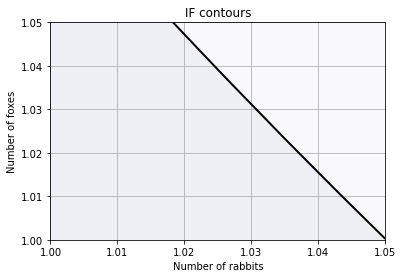

In [ ]:
#-------------------------------------------------------
# plot iso contours
nb_points = 80                              # grid size
x = linspace(0, xmax, nb_points)
y = linspace(0, ymax, nb_points)
X2 , Y2  = meshgrid(x, y)                   # create the grid
Z2 = IF([X2, Y2])                           # compute IF on each point
f3 = p.figure()
CS = p.contourf(X2, Y2, Z2, cmap=p.cm.Purples_r, alpha=0.5)
CS2 = p.contour(X2, Y2, Z2, colors='black', linewidths=2. )
p.clabel(CS2, inline=1, fontsize=16, fmt='%.f')
p.grid()
p.xlabel('Number of rabbits')
p.ylabel('Number of foxes')
p.ylim(1, ymax)
p.xlim(1, xmax)
p.title('IF contours')
f3.savefig('rabbits_and_foxes_3.png')
p.show()